# Clinical Dataset
1. Preprocessing of dataset 
2. Classification of "Fried" Feature

In [21]:
import pandas as pd
import numpy as np

from lib.preprocessing import *
from lib.classifiers import *
from lib.clustering import *

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.metrics import confusion_matrix

In [2]:
clinical = pd.read_csv("clinical_dataset.csv", delimiter=';')

# The Dataset 
Load dataset and check out some features

In [3]:
clinical.head()

,part_id,fried,gender,age,hospitalization_one_year,hospitalization_three_years,ortho_hypotension,vision,audition,weight_loss,...,health_rate_comparison,pain_perception,activity_regular,smoking,alcohol_units,katz_index,iadl_grade,comorbidities_count,comorbidities_significant_count,medication_count
0,1001,Non frail,F,75,0,0,No,Sees moderately,Hears well,No,...,3 - About the same,4.2,> 2 h and < 5 h per week,Never smoked,1.0,6.0,31.0,5,0,5
1,1002,Pre-frail,M,73,0,1,No,Sees moderately,Hears moderately,No,...,2 - A little worse,3.3,> 2 h and < 5 h per week,Never smoked,14.0,6.0,26.0,12,0,4
2,1003,Pre-frail,M,72,0,0,No,Sees moderately,Hears moderately,No,...,3 - About the same,3.4,< 2 h per week,Past smoker (stopped at least 6 months),21.0,6.0,26.0,9,0,3
3,1004,Frail,F,88,0,0,No,Sees moderately,Hears moderately,No,...,3 - About the same,7.3,< 2 h per week,Never smoked,21.0,5.5,20.0,11,0,8
4,1005,Pre-frail,F,83,0,4,Yes,Sees moderately,Hears poorly,No,...,3 - About the same,3.0,> 5 h per week,Current smoker,0.0,6.0,30.0,12,0,4


In [4]:
clinical.columns

Index(['part_id', 'fried', 'gender', 'age', 'hospitalization_one_year',
       'hospitalization_three_years', 'ortho_hypotension', 'vision',
       'audition', 'weight_loss', 'exhaustion_score', 'raise_chair_time',
       'balance_single', 'gait_get_up', 'gait_speed_4m',
       'gait_optional_binary', 'gait_speed_slower', 'grip_strength_abnormal',
       'low_physical_activity', 'falls_one_year', 'fractures_three_years',
       'bmi_score', 'bmi_body_fat', 'waist', 'lean_body_mass',
       'screening_score', 'cognitive_total_score', 'memory_complain', 'sleep',
       'mmse_total_score', 'depression_total_score', 'anxiety_perception',
       'living_alone', 'leisure_out', 'leisure_club', 'social_visits',
       'social_calls', 'social_phone', 'social_skype', 'social_text',
       'house_suitable_participant', 'house_suitable_professional',
       'stairs_number', 'life_quality', 'health_rate',
       'health_rate_comparison', 'pain_perception', 'activity_regular',
       'smoking', 'alc

In [5]:
clinical.isnull().sum()

part_id                              0
fried                                0
gender                               0
age                                  0
hospitalization_one_year             0
hospitalization_three_years          0
ortho_hypotension                    0
vision                               0
audition                             0
weight_loss                          2
exhaustion_score                     0
raise_chair_time                     1
balance_single                       1
gait_get_up                          2
gait_speed_4m                        0
gait_optional_binary                 0
gait_speed_slower                    0
grip_strength_abnormal               0
low_physical_activity                0
falls_one_year                       0
fractures_three_years                0
bmi_score                            2
bmi_body_fat                       133
waist                                3
lean_body_mass                     133
screening_score          

In [6]:
clinical.nunique()

part_id                            540
fried                                3
gender                               2
age                                 27
hospitalization_one_year             8
hospitalization_three_years         12
ortho_hypotension                    2
vision                               3
audition                             3
weight_loss                          2
exhaustion_score                     2
raise_chair_time                   277
balance_single                       3
gait_get_up                        244
gait_speed_4m                      222
gait_optional_binary                 2
gait_speed_slower                    3
grip_strength_abnormal               2
low_physical_activity                2
falls_one_year                       9
fractures_three_years                6
bmi_score                          511
bmi_body_fat                       150
waist                               72
lean_body_mass                     403
screening_score          

# Preprocessing
1. remove erroneous values 
2. converting categorical values to numerical 
3. Filling missing values with column median

In [7]:
clinical_data_proc = remove_erroneous_values(clinical)
clinical_data_proc.head()

,part_id,fried,gender,age,hospitalization_one_year,hospitalization_three_years,ortho_hypotension,vision,audition,weight_loss,...,health_rate_comparison,pain_perception,activity_regular,smoking,alcohol_units,katz_index,iadl_grade,comorbidities_count,comorbidities_significant_count,medication_count
0,1001.0,Non frail,F,75.0,0.0,0.0,No,Sees moderately,Hears well,No,...,3 - About the same,4.2,> 2 h and < 5 h per week,Never smoked,1.0,6.0,31.0,5.0,0.0,5.0
1,1002.0,Pre-frail,M,73.0,0.0,1.0,No,Sees moderately,Hears moderately,No,...,2 - A little worse,3.3,> 2 h and < 5 h per week,Never smoked,14.0,6.0,26.0,12.0,0.0,4.0
2,1003.0,Pre-frail,M,72.0,0.0,0.0,No,Sees moderately,Hears moderately,No,...,3 - About the same,3.4,< 2 h per week,Past smoker (stopped at least 6 months),21.0,6.0,26.0,9.0,0.0,3.0
3,1004.0,Frail,F,88.0,0.0,0.0,No,Sees moderately,Hears moderately,No,...,3 - About the same,7.3,< 2 h per week,Never smoked,21.0,5.5,20.0,11.0,0.0,8.0
4,1005.0,Pre-frail,F,83.0,0.0,4.0,Yes,Sees moderately,Hears poorly,No,...,3 - About the same,3.0,> 5 h per week,Current smoker,0.0,6.0,30.0,12.0,0.0,4.0


In [8]:
clinical_data_proc = transform_categorical_to_numerical(clinical, clinical_data_proc)

In [9]:
clinical_data_proc.isnull().sum()

part_id                              0
fried                                0
gender                               0
age                                  0
hospitalization_one_year             0
hospitalization_three_years          2
ortho_hypotension                    0
vision                               0
audition                             0
weight_loss                          0
exhaustion_score                     0
raise_chair_time                    45
balance_single                       0
gait_get_up                          9
gait_speed_4m                        6
gait_optional_binary                 0
gait_speed_slower                    0
grip_strength_abnormal               0
low_physical_activity                0
falls_one_year                       3
fractures_three_years                1
bmi_score                            2
bmi_body_fat                       134
waist                                3
lean_body_mass                     133
screening_score          

In [10]:
clinical_data_proc_filled = fill_na_with_median(clinical_data_proc)


In [11]:
clinical_data_proc_filled.isnull().sum()

part_id                            0
fried                              0
gender                             0
age                                0
hospitalization_one_year           0
hospitalization_three_years        0
ortho_hypotension                  0
vision                             0
audition                           0
weight_loss                        0
exhaustion_score                   0
raise_chair_time                   0
balance_single                     0
gait_get_up                        0
gait_speed_4m                      0
gait_optional_binary               0
gait_speed_slower                  0
grip_strength_abnormal             0
low_physical_activity              0
falls_one_year                     0
fractures_three_years              0
bmi_score                          0
bmi_body_fat                       0
waist                              0
lean_body_mass                     0
screening_score                    0
cognitive_total_score              0
m

In [12]:
clinical_data_proc_filled.to_csv("clinical_full.csv", index = False)

# Feature Selection
Feature selection is done with: 
1. variance threshold
2. selecting k-best features

In [13]:
variance = np.var(clinical_data_proc_filled)
variance

part_id                            705791.305525
fried                                   0.550243
gender                                  0.238464
age                                    34.573855
hospitalization_one_year                1.271313
hospitalization_three_years             3.196159
ortho_hypotension                       0.112826
vision                                  0.801427
audition                                0.686951
weight_loss                             0.088395
exhaustion_score                        0.172840
raise_chair_time                       33.285610
balance_single                          0.350357
gait_get_up                            48.044137
gait_speed_4m                          16.925279
gait_optional_binary                    0.079462
gait_speed_slower                       0.798340
grip_strength_abnormal                  0.246914
low_physical_activity                   0.136406
falls_one_year                          3.642507
fractures_three_year

In [14]:
clinical_data_proc_filled.drop(['weight_loss', 'exhaustion_score', 'gait_speed_slower', 'grip_strength_abnormal', 'low_physical_activity'], axis = 1, inplace = True)

In [15]:
thres_list = variance[['weight_loss', 'exhaustion_score', 'gait_speed_slower', 'grip_strength_abnormal', 'low_physical_activity']].tolist()
thres = sum(thres_list)/len(thres_list)
thres

0.2885788751714678

In [16]:
features_df_new = feature_selection_var_kbest(clinical_data_proc_filled, "fried", thres, 10)
features_df_new.columns

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Index(['part_id', 'raise_chair_time', 'balance_single', 'gait_get_up',
       'gait_speed_4m', 'bmi_body_fat', 'screening_score', 'mmse_total_score',
       'social_text', 'activity_regular'],
      dtype='object')

In [17]:
final_clinical_data = clinical_data_proc_filled[list(features_df_new.columns)]
final_clinical_data['fried'] = clinical_data_proc_filled['fried']

final_clinical_data.to_csv('final_clinical_data.csv', index = False)

/var/folders/p3/0hxxs9qj1dg_s5vjw8zddyw40000gn/T/ipykernel_9010/820504395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_clinical_data['fried'] = clinical_data_proc_filled['fried']


# Classification
Classification is done on the our cleaned dataset. 
1. KNN and SVM on dataset without dealing with dataset imbalance
2. KNN on dataset dealing with dataset imbalance with undersampling 
3. KNN on dataset dealing with dataset imbalance with oversampling 
3. KNN, SVM, Random Forest and Naive Bayes on dataset dealing with imbalance by combining over and under sampling methods

In [18]:
X = clinical_data_proc_filled[list(features_df_new.columns)]
X.drop('part_id', axis = 1, inplace = True)
y = clinical_data_proc_filled['fried']

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

Accuracy of K Nearest Neighbors Classifier on training set: 0.59259
Accuracy of K Nearest Neighbors Classifier on testing set: 0.60000


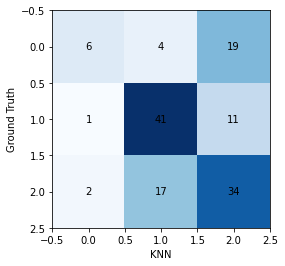

In [23]:
knclass = KNeighborsClassifier(n_neighbors= 17) 
knn_training_acc, knn_test_acc, knn_pred = simple_classification(knclass, X_train, y_train, X_test, y_test)

print('Accuracy of K Nearest Neighbors Classifier on training set: {:.5f}'
     .format(knn_training_acc))
print('Accuracy of K Nearest Neighbors Classifier on testing set: {:.5f}'
     .format(knn_test_acc))
kmeans_cm = create_clustering_confusion_matrix(y_test, knn_pred, "KNN")

Accuracy of Support Vector Machine on training set: 0.63457
Accuracy of Support Vector Machine on testing set: 0.65185


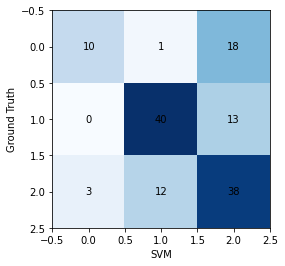

In [24]:
svmclass = SVC(gamma = 1, kernel="rbf") 
svm_training_acc, svm_test_acc, svm_pred = simple_classification(svmclass, X_train, y_train, X_test, y_test)

print('Accuracy of Support Vector Machine on training set: {:.5f}'
     .format(svm_training_acc))
print('Accuracy of Support Vector Machine on testing set: {:.5f}'
     .format(svm_test_acc))
svm_cm = create_clustering_confusion_matrix(y_test, svm_pred, "SVM")

In [25]:
# Check dataset imbalance 
clinical_data_proc_filled.groupby("fried").size()

fried
0    100
1    213
2    227
dtype: int64

In [26]:
print("Before undersampling: ", Counter(y_train))
undersample = RandomUnderSampler(sampling_strategy='all')

# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

# summarize class distribution
print("After undersampling: ", Counter(y_train_under))

Before undersampling:  Counter({2: 174, 1: 160, 0: 71})
After undersampling:  Counter({0: 71, 1: 71, 2: 71})


Accuracy of K Nearest Neighbors Classifier on training set with undersampling: 0.60563
Accuracy of K Nearest Neighbors Classifier on testing set with undersampling: 0.51852


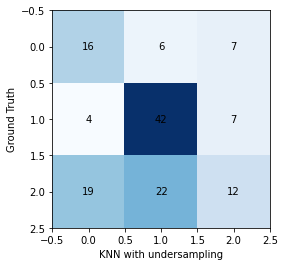

In [32]:
knclass_under = KNeighborsClassifier(n_neighbors= 12)
knn_training_acc_under, knn_test_acc_under, knn_under_pred = simple_classification(knclass, X_train_under, y_train_under, X_test, y_test)

print('Accuracy of K Nearest Neighbors Classifier on training set with undersampling: {:.5f}'
     .format(knn_training_acc_under))
print('Accuracy of K Nearest Neighbors Classifier on testing set with undersampling: {:.5f}'
     .format(knn_test_acc_under)) 
knn_under_cm = create_clustering_confusion_matrix(y_test, knn_under_pred, "KNN with undersampling")

In [33]:
# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
randomover = RandomOverSampler(sampling_strategy="all", random_state=42)

# fit and apply the transform
X_train_randomover, y_train_randomover = randomover.fit_resample(X_train, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_randomover))

Before oversampling:  Counter({2: 174, 1: 160, 0: 71})
After oversampling:  Counter({2: 174, 1: 174, 0: 174})


Accuracy of K Nearest Neighbors Classifier on training set with oversampling: 0.60563
Accuracy of K Nearest Neighbors Classifier on testing set with oversampling: 0.51852


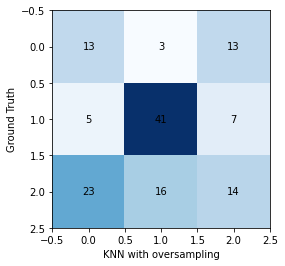

In [34]:
knclass_over = KNeighborsClassifier(n_neighbors= 13) 
knn_training_acc_over, knn_test_acc_over, knn_over_pred = simple_classification(knclass, X_train_randomover, y_train_randomover, X_test, y_test)

print('Accuracy of K Nearest Neighbors Classifier on training set with oversampling: {:.5f}'
     .format(knn_training_acc_under))
print('Accuracy of K Nearest Neighbors Classifier on testing set with oversampling: {:.5f}'
     .format(knn_test_acc_under))
knn_over_cm = create_clustering_confusion_matrix(y_test, knn_over_pred, "KNN with oversampling")

Accuracy of K Nearest Neighbors Classifier on training set using over and under sampling: 0.60494
Accuracy of K Nearest Neighbors Classifier on testing set using over and under sampling: 0.52593


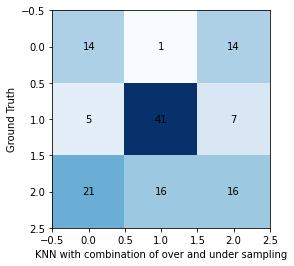

In [36]:
knn_model = KNeighborsClassifier(n_neighbors= 12)
knn_score_train, knn_score_test, knn_comb_pred = classification_with_random_sampling(knn_model, X_train, y_train, X_test, y_test)

print('Accuracy of K Nearest Neighbors Classifier on training set using over and under sampling: %.5f' % knn_score_train)
print('Accuracy of K Nearest Neighbors Classifier on testing set using over and under sampling: %.5f' % knn_score_test)
knn_comb_cm = create_clustering_confusion_matrix(y_test, knn_comb_pred, "KNN with combination of over and under sampling")

Accuracy of Support Vector Classifier on training set using over and under sampling: 0.59012
Accuracy of Support Vector Classifier on testing set using over and under sampling: 0.56296


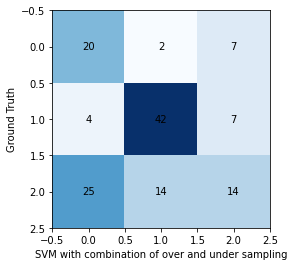

In [49]:
svc_model = SVC(gamma = 0.5, kernel="rbf")
svc_score_train, svc_score_test, svc_comb_pred = classification_with_random_sampling(svc_model, X_train, y_train, X_test, y_test)

print('Accuracy of Support Vector Classifier on training set using over and under sampling: %.5f' % svc_score_train)
print('Accuracy of Support Vector Classifier on testing set using over and under sampling: %.5f' % svc_score_test)
svc_comb_cm = create_clustering_confusion_matrix(y_test, svc_comb_pred, "SVM with combination of over and under sampling")

Accuracy of Random Forest Classifier on training set using over and under sampling: 0.73333
Accuracy of Random Forest Classifier on testing set using over and under sampling: 0.67407


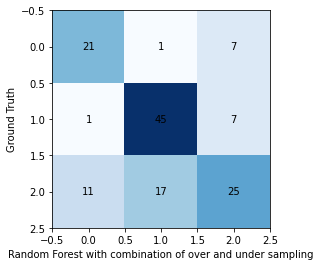

In [56]:
rfc_model = RandomForestClassifier(n_estimators = 10, min_samples_leaf= 4, criterion = "entropy", max_depth = 5, max_features = "log2" )
rfc_score_train, rfc_score_test, rfc_comb_pred = classification_with_random_sampling(rfc_model, X_train, y_train, X_test, y_test)

print('Accuracy of Random Forest Classifier on training set using over and under sampling: %.5f' % rfc_score_train)
print('Accuracy of Random Forest Classifier on testing set using over and under sampling: %.5f' % rfc_score_test)

rfc_comb_cm = create_clustering_confusion_matrix(y_test, rfc_comb_pred, "Random Forest with combination of over and under sampling")

In [57]:
estimator = rfc_model.estimators_[5]
export_graphviz(estimator, out_file='tree.dot',
                rounded = True, proportion = False, 
                precision = 2, filled = True)

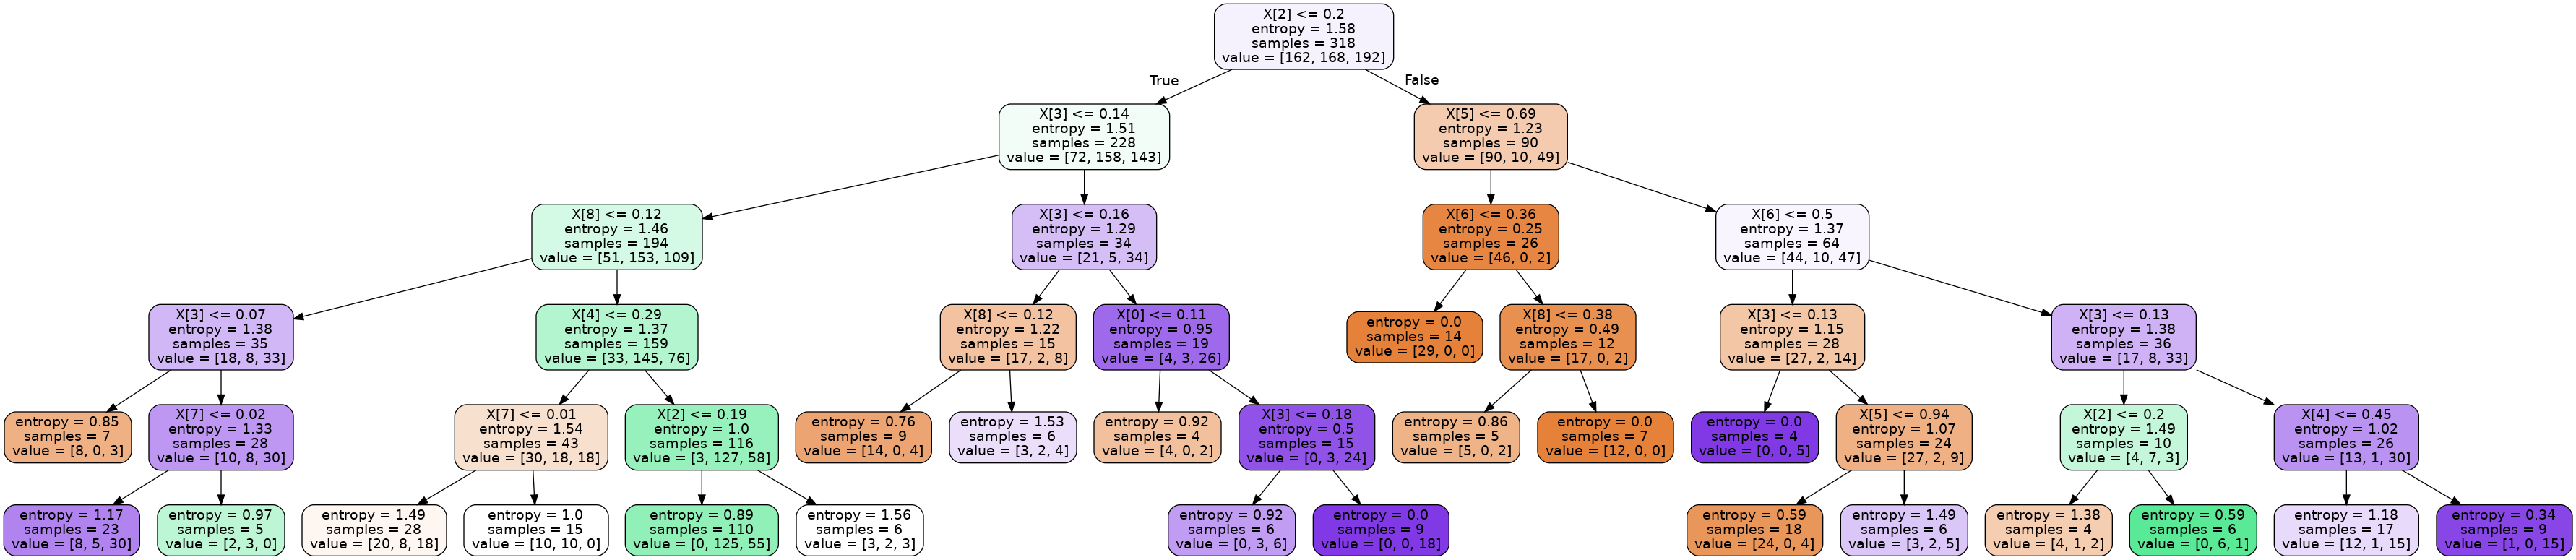

In [59]:
Image(filename = 'tree.png')

Accuracy of Naive Bayes Classifier on training set using over and under sampling: 0.56790
Accuracy of Naive Bayes Classifier on testing set using over and under sampling: 0.64444


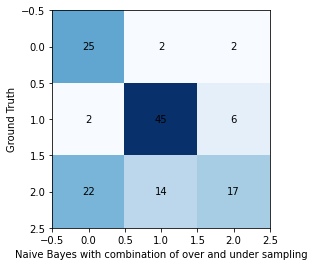

In [58]:
nb_model = GaussianNB()
nb_score_train, nb_score_test, nb_comb_pred = classification_with_random_sampling(nb_model, X_train, y_train, X_test, y_test)

print('Accuracy of Naive Bayes Classifier on training set using over and under sampling: %.5f' % nb_score_train)
print('Accuracy of Naive Bayes Classifier on testing set using over and under sampling: %.5f' % nb_score_test)

nb_comb_cm = create_clustering_confusion_matrix(y_test, nb_comb_pred, "Naive Bayes with combination of over and under sampling")